## Importing necessary libraries

In [1]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from transformers import pipeline
import sklearn
import vaderSentiment

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\su1qt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\su1qt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import os
# Define the paths
scripts_raw_path = r'C:\Users\su1qt\Significant Projects\Honors Research\data\scripts_raw'  # Adjusted path
dialogues_path = r'C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Pocahontas'  # Output directory
output_viz_path = r'C:\Users\su1qt\Significant Projects\Honors Research\outputs\Pocahontas'

# Ensure the output directory exists
if not os.path.exists(dialogues_path):
    os.makedirs(dialogues_path)

# Define the path to the aladdin script
script_filename = 'pocahontas_script.txt'
script_path = os.path.join(scripts_raw_path, script_filename)

# Verify that the script file exists
if not os.path.isfile(script_path):
    print(f"Error: The file {script_path} does not exist.")
else:
    print(f"Processing script: {script_path}")

Processing script: C:\Users\su1qt\Significant Projects\Honors Research\data\scripts_raw\pocahontas_script.txt


## Dialogue Extraction Function

In [3]:
import re

def extract_dialogues(script_path):
    dialogue_pattern = r'^(?P<character>[A-Z][A-Z ]+)\n(?P<dialogue>.+?)(?=\n[A-Z][A-Z ]+\n|$)'
    dialogues = []
    
    with open(script_path, 'r', encoding='utf-8') as file:
        script = file.read()
        
    matches = re.finditer(dialogue_pattern, script, re.MULTILINE | re.DOTALL)
    for match in matches:
        character = match.group("character").strip()
        dialogue = match.group("dialogue").replace('\n', ' ').strip()
        dialogues.append({"Character": character.title(), "Dialogue": dialogue})
    
    return dialogues


## Creating Dataframe

In [4]:
# Extract dialogues from the script
if os.path.isfile(script_path):
    pocahontas_dialogues = extract_dialogues(script_path)
    
    # Debug: Print the number of dialogues extracted
    print(f"Number of dialogues extracted: {len(pocahontas_dialogues)}")
    
    # Debug: Print the first few dialogues
    print("First few dialogues extracted:")
    for dialogue in pocahontas_dialogues[:5]:
        print(dialogue)
    
    # Add film title to each dialogue entry
    for dialogue in pocahontas_dialogues:
        dialogue['Film Title'] = 'Pocahontas'
    
    # Create a DataFrame
    df_pocahontas_dialogues = pd.DataFrame(pocahontas_dialogues)
    
    # Debug: Print DataFrame columns
    print("DataFrame columns:", df_pocahontas_dialogues.columns.tolist())
    
    # Rearrange columns if they exist
    expected_columns = ['Film Title', 'Character', 'Dialogue']
    existing_columns = df_pocahontas_dialogues.columns.tolist()
    columns_to_select = [col for col in expected_columns if col in existing_columns]
    
    if columns_to_select:
        df_pocahontas_dialogues = df_pocahontas_dialogues[columns_to_select]
    else:
        print("Expected columns are not in the DataFrame.")
        print("Available columns:", existing_columns)
    
    # Remove empty dialogues
    df_pocahontas_dialogues = df_pocahontas_dialogues[df_pocahontas_dialogues['Dialogue'] != '']
    
    # Reset index
    df_pocahontas_dialogues.reset_index(drop=True, inplace=True)
    
    # Define the path to save the extracted dialogues
    output_file = os.path.join(dialogues_path, 'pocahontas_dialogues.csv')
    df_pocahontas_dialogues.to_csv(output_file, index=False)
    
    print(f"Extracted dialogues saved to {output_file}")
else:
    print(f"Cannot find the script file at {script_path}. Please check the file path.")


Number of dialogues extracted: 1249
First few dialogues extracted:
{'Character': 'Englishman', 'Dialogue': 'Ready to hoist the cannon?'}
{'Character': 'Englishman', 'Dialogue': 'Aye!'}
{'Character': 'Lon', 'Dialogue': 'Hey, look! Is that Smith?'}
{'Character': 'Ben', 'Dialogue': 'That’s him, all right, the old sea dog.'}
{'Character': 'Thomas', 'Dialogue': 'Captain John Smith! I’ve heard some amazing stories about him.'}
DataFrame columns: ['Character', 'Dialogue', 'Film Title']
Extracted dialogues saved to C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Pocahontas\pocahontas_dialogues.csv


In [5]:
# Load the dialogues DataFrame
dialogues_df = pd.read_csv('C:/Users/su1qt/Significant Projects/Honors Research/data/dialogues/Pocahontas/pocahontas_dialogues.csv')

# Get a list of unique characters
unique_characters = dialogues_df['Character'].unique()

print("List of unique characters:")
for character in unique_characters:
    print(character)

List of unique characters:
Englishman
Lon
Ben
Thomas
John Smith
English Chorus
Ratcliffe
Percy
Englishmen
Wiggins
Native Americans
Kekata
Powhatan
Nakoma
Pocahontas
Grandmother Willow
Animals
Frog
Wind Spirits
Native American
Kocoum
All
Wind Spirit
Namontack
Native American Warriors
Native American Warrior


## Character MetaDara Dictionary

In [6]:
# Character Metadata Dictionary
character_metadata = {
    'Pocahontas': {
        'Gender': 'Female',
        'Race/Ethnicity': 'Native American',
        'Culture': 'Powhatan',
        'Role': 'Protagonist',
        'Marginalized': True,  # Indigenous woman facing colonial pressures
        'POC': True
    },
    'John Smith': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Caucasian',
        'Culture': 'English',
        'Role': 'Protagonist',
        'Marginalized': False,  # English settler with privilege and power
        'POC': False
    },
    'Powhatan': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Native American',
        'Culture': 'Powhatan',
        'Role': 'Supporting',
        'Marginalized': True,  # Indigenous leader with limited power against colonizers
        'POC': True
    },
    'Kocoum': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Native American',
        'Culture': 'Powhatan',
        'Role': 'Supporting',
        'Marginalized': True,  # Warrior from a marginalized indigenous community
        'POC': True
    },
    'Grandmother Willow': {
        'Gender': 'Female',
        'Race/Ethnicity': 'Mythical Entity',
        'Culture': 'Nature/Spiritual',
        'Role': 'Supporting',
        'Marginalized': False,  # Spiritual guide not subject to human power dynamics
        'POC': False
    },
    'Ratcliffe': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Caucasian',
        'Culture': 'English',
        'Role': 'Antagonist',
        'Marginalized': False,  # English governor with colonial power
        'POC': False
    },
    'Nakoma': {
        'Gender': 'Female',
        'Race/Ethnicity': 'Native American',
        'Culture': 'Powhatan',
        'Role': 'Supporting',
        'Marginalized': True,  # Indigenous friend of Pocahontas, part of marginalized community
        'POC': True
    },
    'Kekata': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Native American',
        'Culture': 'Powhatan',
        'Role': 'Supporting',
        'Marginalized': True,  # Tribal shaman within a colonized society
        'POC': True
    },
    'Wiggins': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Caucasian',
        'Culture': 'English',
        'Role': 'Supporting',
        'Marginalized': False,  # Assistant to Ratcliffe, shares in colonial power structure
        'POC': False
    },
    'Namontack': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Native American',
        'Culture': 'Powhatan',
        'Role': 'Supporting',
        'Marginalized': True,  # Indigenous warrior with limited power
        'POC': True
    },
    'Percy': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Animal',
        'Culture': 'English',
        'Role': 'Supporting',
        'Marginalized': False,  # Pet of Ratcliffe, represents colonial culture
        'POC': False
    },
    'Animals': {
        'Gender': 'Unknown',
        'Race/Ethnicity': 'Animal',
        'Culture': 'Nature',
        'Role': 'Supporting',
        'Marginalized': False,  # Not part of human social structure
        'POC': False
    },
    'Wind Spirits': {
        'Gender': 'Unknown',
        'Race/Ethnicity': 'Spiritual Entity',
        'Culture': 'Nature/Spiritual',
        'Role': 'Supporting',
        'Marginalized': False,  # Represents natural forces beyond human control
        'POC': False
    }
}


## Merge metadata with dialogues

In [7]:
# Refined list of relevant characters for Pocahontas
characters_to_keep = [
    'Pocahontas',
    'John Smith',
    'Powhatan',
    'Kocoum',
    'Grandmother Willow',
    'Ratcliffe',
    'Nakoma',
    'Kekata',
    'Wiggins',
    'Namontack',
    'Percy',
    'Animals',
    'Wind Spirits'
]

# Filter the dialogues DataFrame to include only relevant characters
filtered_dialogues_df = dialogues_df[dialogues_df['Character'].isin(characters_to_keep)]
filtered_dialogues_df.head()



,Film Title,Character,Dialogue
7,Pocahontas,John Smith,That’s right. I’m not about to let you boys ha...
16,Pocahontas,John Smith,Reef the topsails!
18,Pocahontas,John Smith,"Steady on the course. It’s all right, Thomas. ..."
22,Pocahontas,John Smith,"Thomas, watch out!"
27,Pocahontas,John Smith,Pull the pin!


In [8]:
# Convert the metadata dictionary to a DataFrame
metadata_df = pd.DataFrame.from_dict(character_metadata, orient='index')

# Reset the index to make 'Character' a column
metadata_df.reset_index(inplace=True)
metadata_df.rename(columns={'index': 'Character'}, inplace=True)

# Preview the metadata DataFrame
print("Metadata DataFrame:")
metadata_df.head()

# Merge the filtered dialogues with the character metadata on 'Character'
annotated_dialogues_df = pd.merge(filtered_dialogues_df, metadata_df, on='Character', how='left')

Metadata DataFrame:


In [9]:
# Identify any characters with missing metadata
missing_metadata = annotated_dialogues_df[annotated_dialogues_df['Gender'].isnull()]['Character'].unique()

if len(missing_metadata) > 0:
    print("Characters missing metadata:")
    for character in missing_metadata:
        print(character)
else:
    print("All characters have metadata.")

All characters have metadata.


In [10]:
# Rearrange columns for clarity
columns_order = [
    'Film Title', 'Character', 'Gender', 'Race/Ethnicity', 'Culture',
    'Role', 'Marginalized', 'POC', 'Dialogue'
]
annotated_dialogues_df = annotated_dialogues_df[columns_order]

# Preview the annotated dialogues DataFrame
print("Annotated Dialogues DataFrame:")
annotated_dialogues_df.sample(10)


Annotated Dialogues DataFrame:


,Film Title,Character,Gender,Race/Ethnicity,Culture,Role,Marginalized,POC,Dialogue
545,Pocahontas,Wind Spirits,Unknown,Spiritual Entity,Nature/Spiritual,Supporting,False,False,You will understand
889,Pocahontas,Pocahontas,Female,Native American,Powhatan,Protagonist,True,True,"Mountain, help my heart be great"
795,Pocahontas,Ratcliffe,Male,Caucasian,English,Antagonist,False,False,"Lies! Lies, all of it! Murderous thieves, ther..."
817,Pocahontas,Grandmother Willow,Female,Mythical Entity,Nature/Spiritual,Supporting,False,False,"The earth is trembling, child. What’s happened?"
822,Pocahontas,Pocahontas,Female,Native American,Powhatan,Protagonist,True,True,Maybe it’s not too late to stop this. You have...
445,Pocahontas,Ratcliffe,Male,Caucasian,English,Antagonist,False,False,(muffled) How dare you! Untie me at once! I’ll...
433,Pocahontas,Pocahontas,Female,Native American,Powhatan,Protagonist,True,True,Is the death of all I love
366,Pocahontas,Pocahontas,Female,Native American,Powhatan,Protagonist,True,True,"Meeko, come back!"
56,Pocahontas,Powhatan,Male,Native American,Powhatan,Supporting,True,True,This is the right path for you.
458,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,But I can’t leave you.


In [11]:
# Define output file path and save the annotated DataFrame
output_file = os.path.join(dialogues_path, 'pocahontas_annotated_dialogues.csv')
annotated_dialogues_df.to_csv(output_file, index=False)
print(f"Annotated dialogues saved to {output_file}")

Annotated dialogues saved to C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Pocahontas\pocahontas_annotated_dialogues.csv


## Preprocessing the text data

In [12]:
# Define the path to the annotated dialogues CSV
dialogues_path = r'C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Pocahontas'
annotated_dialogues_file = os.path.join(dialogues_path, 'pocahontas_annotated_dialogues.csv')

# Check if the file exists
if not os.path.isfile(annotated_dialogues_file):
    raise FileNotFoundError(f"The file {annotated_dialogues_file} does not exist. Please check the path.")

# Load the annotated dialogues DataFrame
annotated_dialogues_df = pd.read_csv(annotated_dialogues_file)

# Display the first few rows
annotated_dialogues_df.head(5)

,Film Title,Character,Gender,Race/Ethnicity,Culture,Role,Marginalized,POC,Dialogue
0,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,That’s right. I’m not about to let you boys ha...
1,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,Reef the topsails!
2,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,"Steady on the course. It’s all right, Thomas. ..."
3,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,"Thomas, watch out!"
4,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,Pull the pin!


## Cleaning the dialogue text

In [13]:
import unicodedata
# Function to clean and normalize dialogue text
def clean_and_normalize_text(text):
    """
    Clean and normalize dialogue text to handle encoding issues and remove unwanted characters.
    
    Parameters:
        text (str): The original dialogue text.
    
    Returns:
        str: The cleaned and normalized dialogue text.
    """
    # Normalize encoding issues (e.g., eâ€™ -> ’)
    text = unicodedata.normalize("NFKD", text)

    text = text.replace("â€™", "'")
    
    # Remove stage directions enclosed in brackets []
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove parentheses and their content (e.g., (laughs))
    text = re.sub(r'\(.*?\)', '', text)
    
    # Remove extra whitespace
    text = text.strip()
    
    return text

# Apply the cleaning and normalization function to the 'Dialogue' column
annotated_dialogues_df['Cleaned Dialogue'] = annotated_dialogues_df['Dialogue'].apply(clean_and_normalize_text)
annotated_dialogues_df.sample(5)

,Film Title,Character,Gender,Race/Ethnicity,Culture,Role,Marginalized,POC,Dialogue,Cleaned Dialogue
526,Pocahontas,Grandmother Willow,Female,Mythical Entity,Nature/Spiritual,Supporting,False,False,"Oh, a dream! Let’s hear all about it!","Oh, a dream! Let’s hear all about it!"
903,Pocahontas,Ratcliffe,Male,Caucasian,English,Antagonist,False,False,"Traitors! Unhand me, I say, how dare you!","Traitors! Unhand me, I say, how dare you!"
684,Pocahontas,Ratcliffe,Male,Caucasian,English,Antagonist,False,False,"Take that silly… Of course, the Indians! Wiggi...","Take that silly... Of course, the Indians! Wig..."
370,Pocahontas,Pocahontas,Female,Native American,Powhatan,Protagonist,True,True,What are you doing? Meeko!,What are you doing? Meeko!
176,Pocahontas,Pocahontas,Female,Native American,Powhatan,Protagonist,True,True,This is how we say hello. Wingapo.,This is how we say hello. Wingapo.


## Expanding Contractions

In [14]:
import contractions

def expand_contractions_func(text):
    """
    Expand contractions in the text to their full forms.
    
    Parameters:
        text (str): The cleaned dialogue text.
    
    Returns:
        str: The dialogue text with expanded contractions.
    """
    return contractions.fix(text)

# Apply the contraction expansion function
annotated_dialogues_df['Cleaned Dialogue'] = annotated_dialogues_df['Cleaned Dialogue'].apply(expand_contractions_func)

# Display the first few dialogues after expanding contractions
annotated_dialogues_df[['Dialogue', 'Cleaned Dialogue']].head(5)

,Dialogue,Cleaned Dialogue
0,That’s right. I’m not about to let you boys ha...,That is right. I am not about to let you boys ...
1,Reef the topsails!,Reef the topsails!
2,"Steady on the course. It’s all right, Thomas. ...","Steady on the course. It is all right, Thomas...."
3,"Thomas, watch out!","Thomas, watch out!"
4,Pull the pin!,Pull the pin!


In [15]:
# Define the path to save the preprocessed dialogues
preprocessed_file = os.path.join(dialogues_path, 'pocahontas_preprocessed_dialogues.csv')

# Save the preprocessed DataFrame
annotated_dialogues_df.to_csv(preprocessed_file, index=False)

print(f"\nPreprocessed dialogues saved to {preprocessed_file}")


Preprocessed dialogues saved to C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Pocahontas\pocahontas_preprocessed_dialogues.csv


## Sentiment Analysis Using VADER

In [16]:
# Define the path to the preprocessed dialogues CSV
dialogues_path = r'C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Pocahontas'
preprocessed_dialogues_file = os.path.join(dialogues_path, 'pocahontas_preprocessed_dialogues.csv')

# Check if the file exists
if not os.path.isfile(preprocessed_dialogues_file):
    raise FileNotFoundError(f"The file {preprocessed_dialogues_file} does not exist. Please check the path.")

# Load the preprocessed dialogues DataFrame
preprocessed_dialogues_df = pd.read_csv(preprocessed_dialogues_file)
preprocessed_dialogues_df['Cleaned Dialogue'] = preprocessed_dialogues_df['Cleaned Dialogue'].fillna('').astype(str)
# Display the first few rows

preprocessed_dialogues_df.sample(5)

,Film Title,Character,Gender,Race/Ethnicity,Culture,Role,Marginalized,POC,Dialogue,Cleaned Dialogue
916,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,Then I’ll stay with you.,Then I will stay with you.
292,Pocahontas,Grandmother Willow,Female,Mythical Entity,Nature/Spiritual,Supporting,False,False,There’s still some snap in these old vines.,There is still some snap in these old vines.
266,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,No gold?,No gold?
671,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,"Well, when I say uncivilized, what I mean is –...","Well, when I say uncivilized, what I mean is –..."
0,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,That’s right. I’m not about to let you boys ha...,That is right. I am not about to let you boys ...


In [17]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\su1qt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Calculate Sentiment Scores and Labels

In [18]:
def get_sentiment_scores(text):
    """
    Calculate sentiment scores for the given text using VADER.
    
    Parameters:
        text (str): The preprocessed dialogue text.
    
    Returns:
        dict: A dictionary containing 'neg', 'neu', 'pos', and 'compound' scores.
    """
    return sia.polarity_scores(text)

def categorize_sentiment(score):
    """
    Categorize sentiment based on the compound score.
    
    Parameters:
        score (float): The compound sentiment score.
    
    Returns:
        str: The sentiment category ('Positive 😊', 'Negative 😡', 'Neutral 😐').
    """
    if score >= 0.05:
        return 'Positive 😊'
    elif score <= -0.05:
        return 'Negative 😡'
    else:
        return 'Neutral 😐'

## Applying sentiment analysis to each dialogue

In [19]:
# Apply the sentiment scores function to the 'Cleaned Dialogue' column
preprocessed_dialogues_df['Sentiment Scores'] = preprocessed_dialogues_df['Cleaned Dialogue'].apply(get_sentiment_scores)

# Extract the compound score
preprocessed_dialogues_df['Compound Score'] = preprocessed_dialogues_df['Sentiment Scores'].apply(lambda x: x['compound'])

# Categorize sentiment based on the compound score
preprocessed_dialogues_df['Sentiment'] = preprocessed_dialogues_df['Compound Score'].apply(categorize_sentiment)

# Display the first few dialogues with sentiment scores and labels
preprocessed_dialogues_df[['Cleaned Dialogue', 'Compound Score', 'Sentiment']].sample(5)

,Cleaned Dialogue,Compound Score,Sentiment
286,"Come closer, John Smith. He has a good soul. A...",0.7269,Positive 😊
465,"Hang on, Thomas. I have got you.",0.0000,Neutral 😐
616,"Savages! It is an ambush, arm yourselves!",-0.6103,Negative 😡
473,,0.0000,Neutral 😐
434,"No! If you kill him you will have to kill me, ...",-0.9168,Negative 😡


In [20]:
# Define the path to save the sentiment-analyzed dialogues
sentiment_file = os.path.join(dialogues_path, 'pocahontas_sentiment_dialogues.csv')

# Save the DataFrame with sentiment analysis
preprocessed_dialogues_df.to_csv(sentiment_file, index=False)

print(f"\nDialogues with sentiment analysis saved to {sentiment_file}")


Dialogues with sentiment analysis saved to C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Pocahontas\pocahontas_sentiment_dialogues.csv


# Analyzing the results

In [21]:
# Define the path to the sentiment-analyzed dialogues CSV
dialogues_path = r'C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Pocahontas'
sentiment_dialogues_file = os.path.join(dialogues_path, 'pocahontas_sentiment_dialogues.csv')

# Check if the file exists
if not os.path.isfile(sentiment_dialogues_file):
    raise FileNotFoundError(f"The file {sentiment_dialogues_file} does not exist. Please check the path.")

# Load the sentiment-analyzed dialogues DataFrame
sentiment_dialogues_df = pd.read_csv(sentiment_dialogues_file)

# Display the first few rows
sentiment_dialogues_df.sample(10)

,Film Title,Character,Gender,Race/Ethnicity,Culture,Role,Marginalized,POC,Dialogue,Cleaned Dialogue,Sentiment Scores,Compound Score,Sentiment
707,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,I had to see you again.,I had to see you again.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐
223,Pocahontas,Wiggins,Male,Caucasian,English,Supporting,False,False,I… I… I made it myself.,I... I... I made it myself.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐
462,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,"Steady on the course. It’s all right, Thomas. ...","Steady on the course. It is all right, Thomas....","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐
438,Pocahontas,Ratcliffe,Male,Caucasian,English,Antagonist,False,False,"Now’s our chance, fire!","Now’s our chance, fire!","{'neg': 0.402, 'neu': 0.299, 'pos': 0.299, 'co...",-0.1759,Negative 😡
41,Pocahontas,Powhatan,Male,Native American,Powhatan,Supporting,True,True,… destroying every enemy in his path. Tonight ...,... destroying every enemy in his path. Tonigh...,"{'neg': 0.333, 'neu': 0.516, 'pos': 0.15, 'com...",-0.5994,Negative 😡
306,Pocahontas,Kocoum,Male,Native American,Powhatan,Supporting,True,True,Look at them. Now we have enough warriors to d...,Look at them. Now we have enough warriors to d...,"{'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compou...",-0.5848,Negative 😡
729,Pocahontas,Pocahontas,Female,Native American,Powhatan,Protagonist,True,True,Will they leave?,Will they leave?,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.0516,Negative 😡
258,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,"This place is incredible! And to think, we cam...","This place is incredible! And to think, we cam...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐
235,Pocahontas,Powhatan,Male,Native American,Powhatan,Supporting,True,True,"When I see you wear that necklace, you look ju...","When I see you wear that necklace, you look ju...","{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...",0.3612,Positive 😊
164,Pocahontas,Kekata,Male,Native American,Powhatan,Supporting,True,True,[Chanting.] This wound is strange to me.,This wound is strange to me.,"{'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'comp...",-0.2023,Negative 😡



Summary Statistics of Compound Sentiment Scores:
count    920.000000
mean       0.031051
std        0.350249
min       -0.932900
25%        0.000000
50%        0.000000
75%        0.203150
max        0.942500
Name: Compound Score, dtype: float64


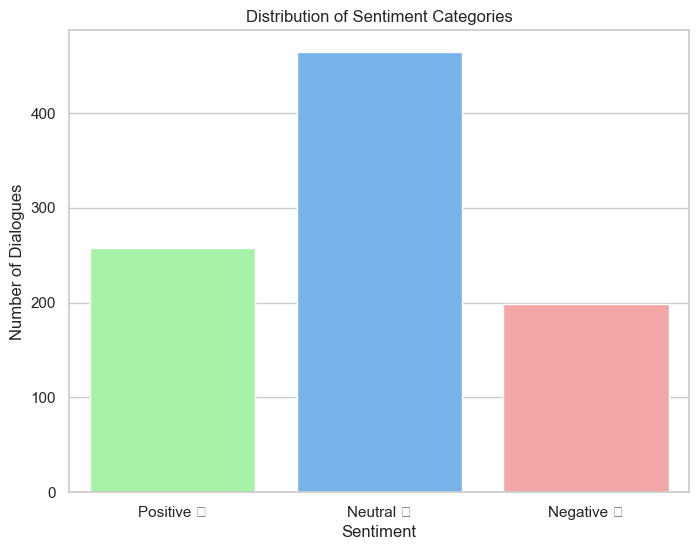

In [52]:
import warnings
warnings.filterwarnings('ignore')


sns.set(style="whitegrid")

# Summary statistics of the Compound Sentiment Scores
print("\nSummary Statistics of Compound Sentiment Scores:")
print(sentiment_dialogues_df['Compound Score'].describe())

x_sentiments = ['Positive 😊', 'Neutral 😐', 'Negative 😡']
x_colors = ['#99ff99', '#66b3ff', '#ff9999']


# Simple bar chart showing the count of each sentiment category
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=sentiment_dialogues_df, order=x_sentiments, palette=x_colors)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Number of Dialogues')

filename = 'average_sentiment_distribution.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')

plt.show()
plt.close()


Average Sentiment by Character Role:
          Role  Compound Score
0   Antagonist        0.098889
1  Protagonist        0.024911
2   Supporting        0.008786


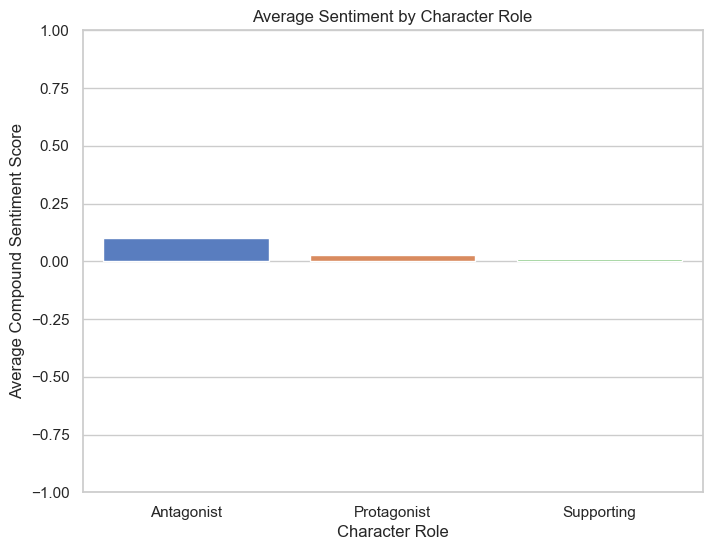

In [23]:
# Calculate average sentiment for each role
role_sentiment = sentiment_dialogues_df.groupby('Role')['Compound Score'].mean().reset_index()

# Display the average sentiment by role
print("\nAverage Sentiment by Character Role:")
print(role_sentiment)

# Bar chart to compare average sentiment across roles
plt.figure(figsize=(8,6))
sns.barplot(x='Role', y='Compound Score', data=role_sentiment, palette='muted')
plt.title('Average Sentiment by Character Role')
plt.xlabel('Character Role')
plt.ylabel('Average Compound Sentiment Score')
plt.ylim(-1, 1)  # VADER scores range from -1 to 1

filename = 'average_sentiment_by_char_role.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')

plt.show()
plt.close()


Average Sentiment by Marginalized Status:
   Marginalized  Compound Score
0         False        0.065381
1          True       -0.005436


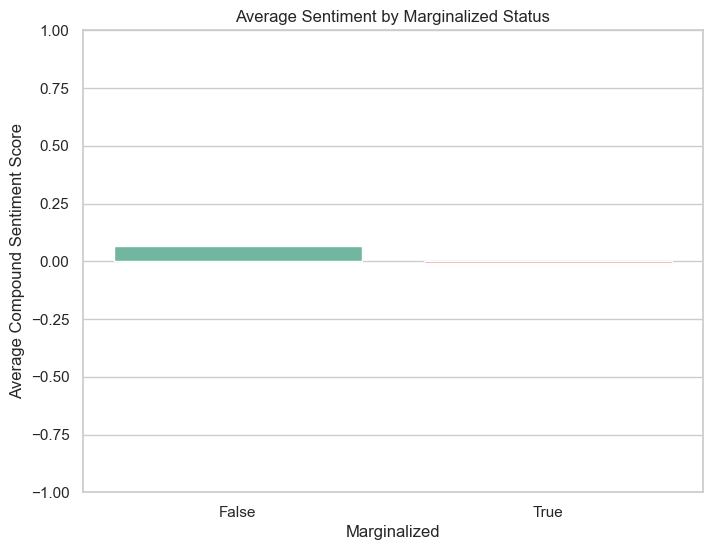

In [24]:
# Calculate average sentiment based on Marginalized status
marginalized_sentiment = sentiment_dialogues_df.groupby('Marginalized')['Compound Score'].mean().reset_index()

# Display the results
print("\nAverage Sentiment by Marginalized Status:")
print(marginalized_sentiment)

# Bar chart to compare average sentiment
plt.figure(figsize=(8,6))
sns.barplot(x='Marginalized', y='Compound Score', data=marginalized_sentiment, palette='Set2')
plt.title('Average Sentiment by Marginalized Status')
plt.xlabel('Marginalized')
plt.ylabel('Average Compound Sentiment Score')
plt.ylim(-1, 1)
filename = 'average_sentiment_by_marginalized_status.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')

plt.show()
plt.close()


Average Sentiment by POC Status:
     POC  Compound Score
0  False        0.065381
1   True       -0.005436


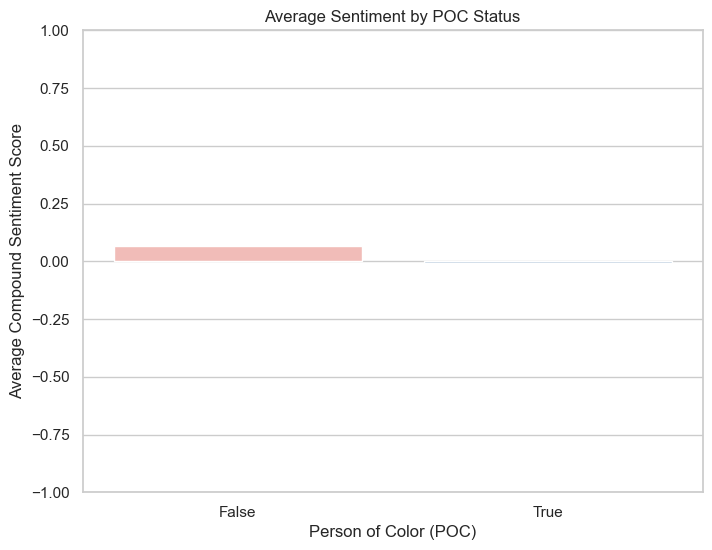

In [25]:
# Calculate average sentiment based on POC status
poc_sentiment = sentiment_dialogues_df.groupby('POC')['Compound Score'].mean().reset_index()

# Display the results
print("\nAverage Sentiment by POC Status:")
print(poc_sentiment)

# Bar chart to compare average sentiment
plt.figure(figsize=(8,6))
sns.barplot(x='POC', y='Compound Score', data=poc_sentiment, palette='Pastel1')
plt.title('Average Sentiment by POC Status')
plt.xlabel('Person of Color (POC)')
plt.ylabel('Average Compound Sentiment Score')
plt.ylim(-1, 1)
filename = 'average_sentiment_by_POC.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')

plt.show()
plt.close()

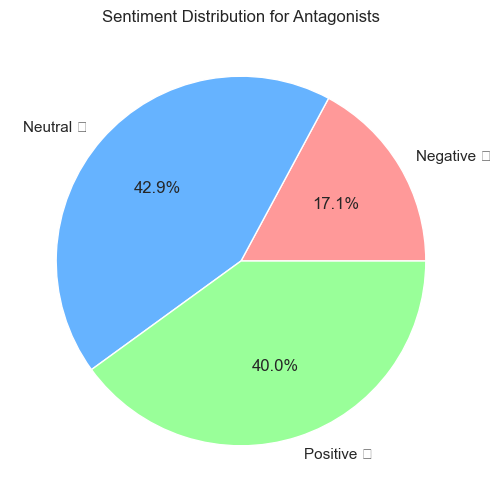

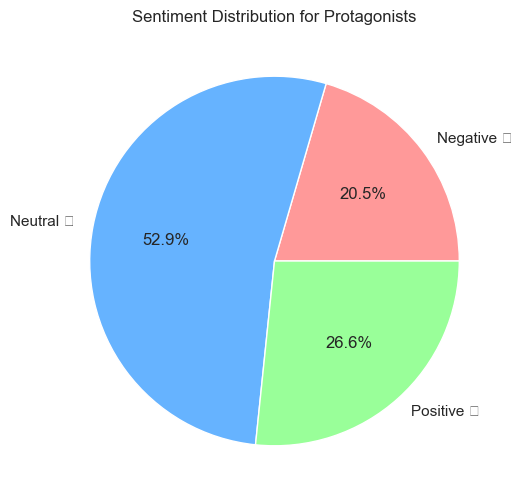

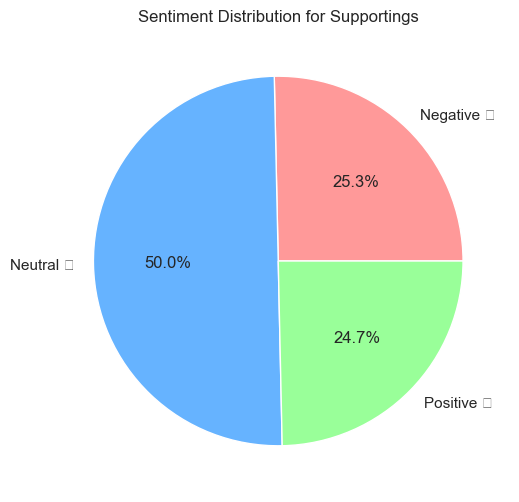

In [26]:
# Calculate sentiment distribution by role
role_sentiment_counts = sentiment_dialogues_df.groupby(['Role', 'Sentiment']).size().reset_index(name='Counts')

# Function to plot pie chart for a given role
def plot_pie(role):
    role_data = role_sentiment_counts[role_sentiment_counts['Role'] == role]
    plt.figure(figsize=(6,6))
    plt.pie(role_data['Counts'], labels=role_data['Sentiment'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
    plt.title(f'Sentiment Distribution for {role}s')
    filename = f'sentiment_distribution_for_{role.lower()}.png'
    filepath = os.path.join(output_viz_path,filename)
    plt.savefig(filepath,dpi=300,bbox_inches='tight')
    plt.show()
    plt.close()
# Plot pie charts for each role
plot_pie('Antagonist')
plot_pie('Protagonist')
plot_pie('Supporting')

In [27]:
# Create a crosstab to count sentiments by Role and Marginalized status
pivot_marginalized = pd.crosstab(
    index=[sentiment_dialogues_df['Role'], sentiment_dialogues_df['Marginalized']],
    columns=sentiment_dialogues_df['Sentiment']
).fillna(0)

# Display the pivot table
print("\nCrosstab of Sentiments by Role and Marginalized Status:")
pivot_marginalized


Crosstab of Sentiments by Role and Marginalized Status:


Sentiment                 Negative 😡  Neutral 😐  Positive 😊
Role        Marginalized                                   
Antagonist  False                 24         60          56
Protagonist False                 54        106          66
            True                  46        152          64
Supporting  False                 18         56          34
            True                  56         90          38

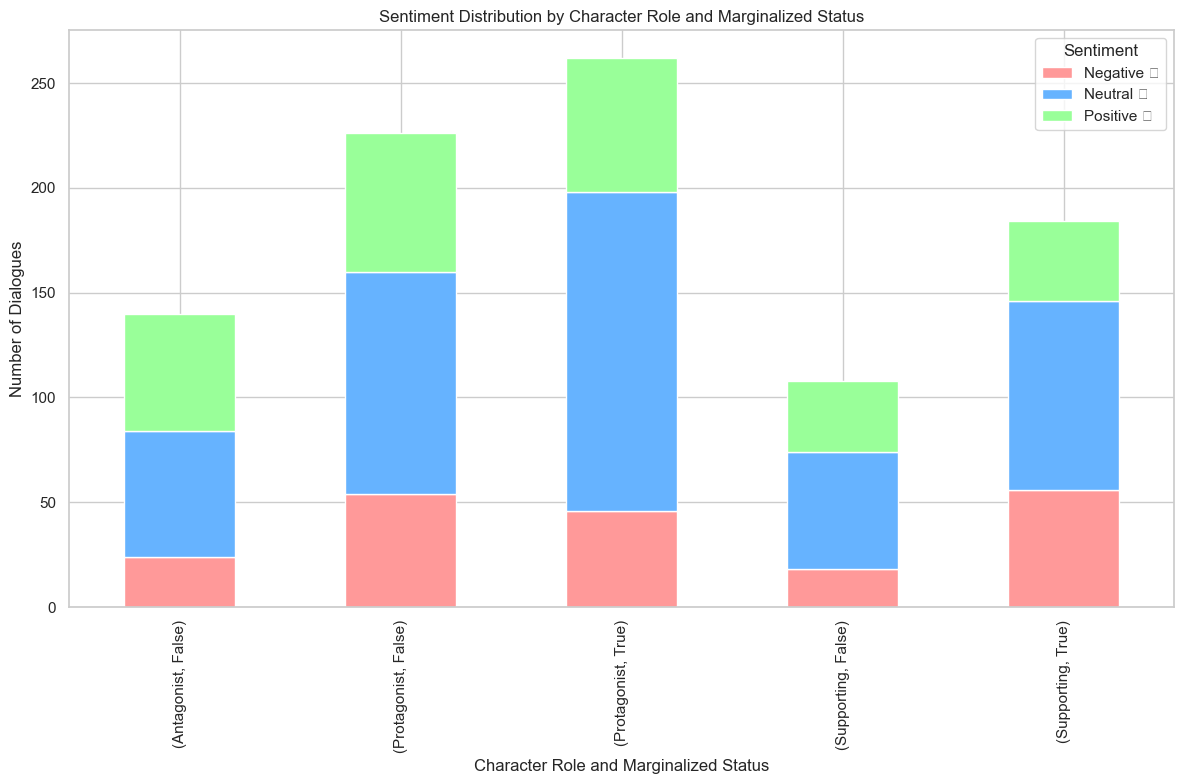

In [28]:
# Reset index to turn MultiIndex into columns
pivot_marginalized_reset = pivot_marginalized.reset_index()

# Rename columns for clarity
pivot_marginalized_reset.columns.name = None
pivot_marginalized_reset = pivot_marginalized_reset.rename(columns={
    'Role': 'Character Role',
    'Marginalized': 'Marginalized Status'
})

# Plotting
pivot_marginalized_reset.set_index(['Character Role', 'Marginalized Status']).plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=['#ff9999','#66b3ff','#99ff99']
)

plt.title('Sentiment Distribution by Character Role and Marginalized Status')
plt.xlabel('Character Role and Marginalized Status')
plt.ylabel('Number of Dialogues')
plt.legend(title='Sentiment')
plt.tight_layout()
filename = 'sentiment_distribution_charrole_and_marg_status.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')
plt.show()


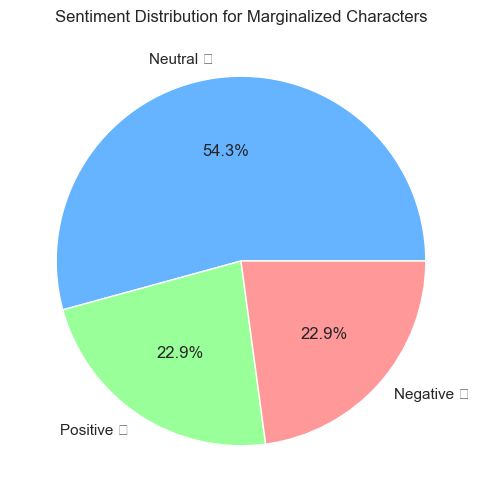

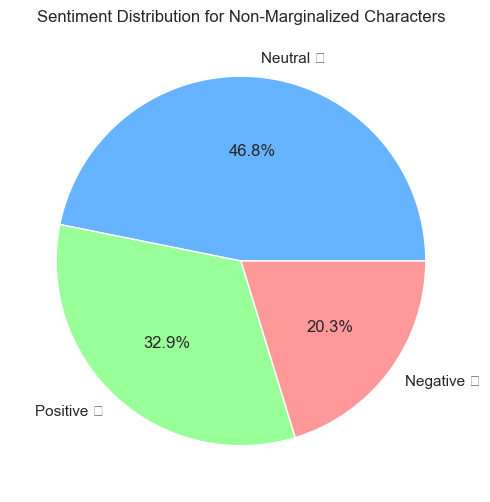

In [29]:
# Define a function to plot pie charts
def plot_pie(data, title, filename,output_path):
    sentiment_counts = data['Sentiment'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
    plt.title(title)

    filepath= os.path.join(output_path,filename)
    plt.savefig(filepath,dpi=300,bbox_inches='tight')
    plt.show()
    

# Plot pie chart for Marginalized Characters
marginalized_data = sentiment_dialogues_df[sentiment_dialogues_df['Marginalized'] == True]
plot_pie(marginalized_data, 'Sentiment Distribution for Marginalized Characters','sentiment_distribution_marg_chars.png',output_viz_path)

# Plot pie chart for Non-Marginalized Characters
non_marginalized_data = sentiment_dialogues_df[sentiment_dialogues_df['Marginalized'] == False]
plot_pie(non_marginalized_data, 'Sentiment Distribution for Non-Marginalized Characters','sentiment_distribution_non_marg_chars.png',output_viz_path)

In [30]:
gender_counts = sentiment_dialogues_df['Gender'].value_counts().reset_index()
gender_counts.columns = ["Gender","Dialogue Count"]
gender_counts.head()

,Gender,Dialogue Count
0,Male,526
1,Female,388
2,Unknown,6


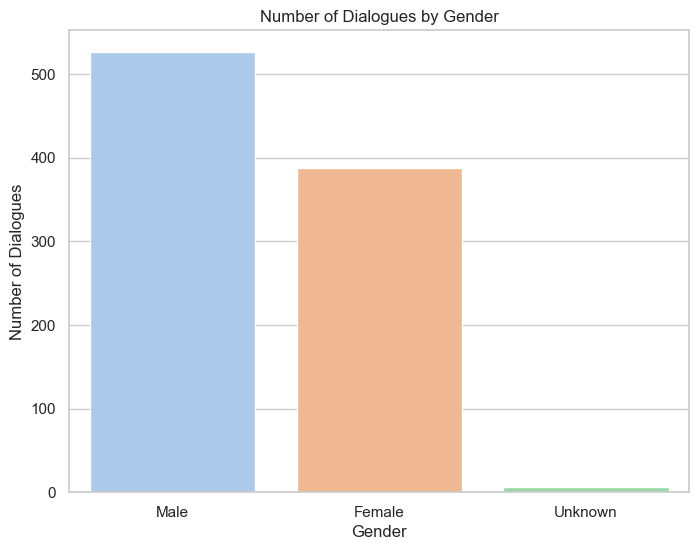

In [31]:
# Plotting Dialogue Counts by Gender
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Dialogue Count', data=gender_counts, palette='pastel')
plt.title('Number of Dialogues by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Dialogues')
filename='dialogue_distribution_by_gender.png'
filepath=os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')
plt.show()
plt.close()

In [32]:
# Calculate sentiment distribution by gender
gender_sentiment_counts = sentiment_dialogues_df.groupby(['Gender', 'Sentiment']).size().reset_index(name='Counts')

gender_sentiment_counts

,Gender,Sentiment,Counts
0,Female,Negative 😡,74
1,Female,Neutral 😐,218
2,Female,Positive 😊,96
3,Male,Negative 😡,124
4,Male,Neutral 😐,240
5,Male,Positive 😊,162
6,Unknown,Neutral 😐,6


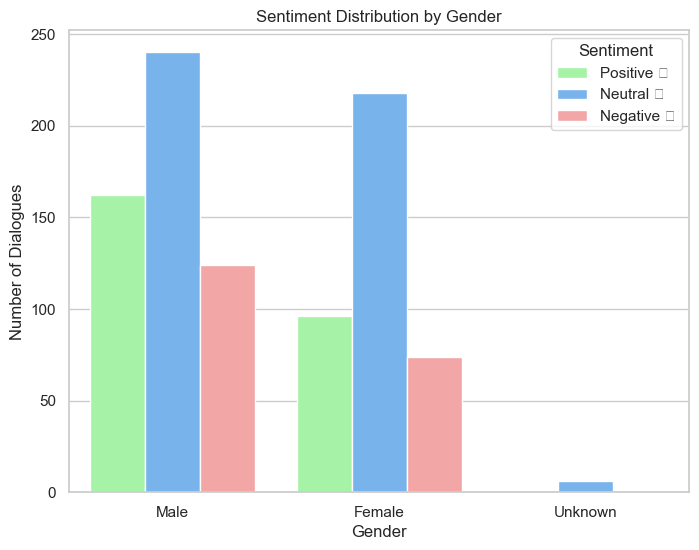

In [33]:
# Plotting Sentiment Distribution by Gender
plt.figure(figsize=(8,6))

sns.countplot(x='Gender', hue='Sentiment', data=sentiment_dialogues_df, palette=['#99ff99','#66b3ff','#ff9999'])
plt.title('Sentiment Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Dialogues')
plt.legend(title='Sentiment')
filename='sentiment_distribution_by_gender.png'
filepath=os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')
plt.show()
plt.close()

In [34]:
# Calculate average sentiment score by gender
gender_avg_sentiment = sentiment_dialogues_df.groupby('Gender')['Compound Score'].mean().reset_index()

gender_avg_sentiment

,Gender,Compound Score
0,Female,0.023556
1,Male,0.036933
2,Unknown,0.000000


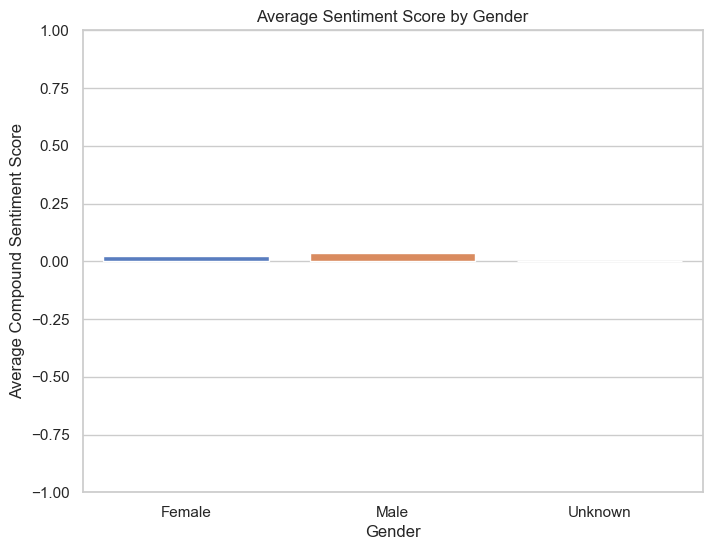

In [35]:
# Plotting Average Sentiment Score by Gender
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Compound Score', data=gender_avg_sentiment, palette='muted')
plt.title('Average Sentiment Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Compound Sentiment Score')
plt.ylim(-1, 1)  # VADER scores range from -1 to 1

filename='average_sentiment_score_by_gender.png'
filepath=os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')
plt.show()
plt.close()

In [36]:
# Create a new column with descriptive labels for POC status
sentiment_dialogues_df['POC_Status'] = sentiment_dialogues_df['POC'].map({True: 'POC', False: 'Non-POC'})

# Verify the mapping
sentiment_dialogues_df[['Gender', 'POC', 'POC_Status']].sample(6)

,Gender,POC,POC_Status
644,Female,True,POC
36,Female,True,POC
869,Male,False,Non-POC
888,Female,True,POC
591,Male,False,Non-POC
380,Female,True,POC


In [37]:
# Recalculate sentiment distribution using POC_Status
gender_poc_sentiment = sentiment_dialogues_df.groupby(['Gender', 'POC_Status', 'Sentiment']).size().reset_index(name='Counts')

# Display the updated grouped data
gender_poc_sentiment

,Gender,POC_Status,Sentiment,Counts
0,Female,Non-POC,Negative 😡,12
1,Female,Non-POC,Neutral 😐,32
2,Female,Non-POC,Positive 😊,20
3,Female,POC,Negative 😡,62
4,Female,POC,Neutral 😐,186
5,Female,POC,Positive 😊,76
6,Male,Non-POC,Negative 😡,84
7,Male,Non-POC,Neutral 😐,184
8,Male,Non-POC,Positive 😊,136
9,Male,POC,Negative 😡,40


In [38]:
# Pivot the data for stacked bar plot
pivot_gender_poc = gender_poc_sentiment.pivot_table(
    index=['Gender', 'POC_Status'],
    columns='Sentiment',
    values='Counts',
    fill_value=0
).reset_index()

pivot_gender_poc

Sentiment,Gender,POC_Status,Negative 😡,Neutral 😐,Positive 😊
0,Female,Non-POC,12.0,32.0,20.0
1,Female,POC,62.0,186.0,76.0
2,Male,Non-POC,84.0,184.0,136.0
3,Male,POC,40.0,56.0,26.0
4,Unknown,Non-POC,0.0,6.0,0.0


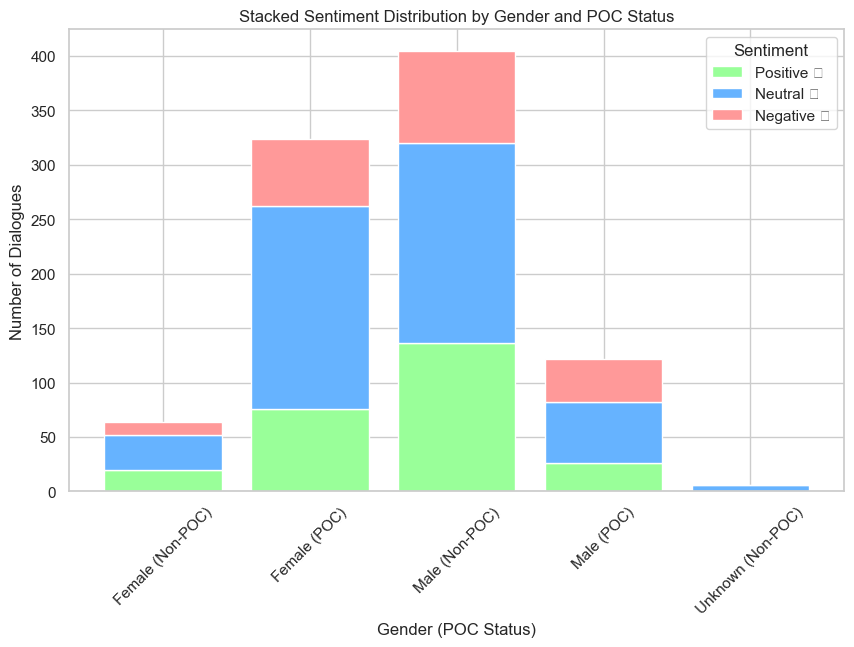

In [39]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Initialize the bottom position for stacking
bottom = None

# Define the sentiments and corresponding colors
sentiments = ['Positive 😊', 'Neutral 😐', 'Negative 😡']
colors = ['#99ff99', '#66b3ff', '#ff9999']

# Loop through sentiments to create stacked bars
for i, sentiment in enumerate(sentiments):
    if i == 0:
        plt.bar(
            pivot_gender_poc['Gender'] + ' (' + pivot_gender_poc['POC_Status'] + ')',
            pivot_gender_poc[sentiment],
            color=colors[i],
            label=sentiment
        )
        bottom = pivot_gender_poc[sentiment]
    else:
        plt.bar(
            pivot_gender_poc['Gender'] + ' (' + pivot_gender_poc['POC_Status'] + ')',
            pivot_gender_poc[sentiment],
            bottom=bottom,
            color=colors[i],
            label=sentiment
        )
        bottom += pivot_gender_poc[sentiment]

# Add title and labels
plt.title('Stacked Sentiment Distribution by Gender and POC Status')
plt.xlabel('Gender (POC Status)')
plt.ylabel('Number of Dialogues')
plt.legend(title='Sentiment')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot
#plt.savefig(os.path.join(output_folder, 'stacked_bar_charts', 'stacked_sentiment_distribution_by_gender_poc.png'), dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Close the plot to free memory
plt.close()

In [40]:
# Create a combined category for POC and Marginalized Status
sentiment_dialogues_df['POC_Marginalized'] = sentiment_dialogues_df.apply(
    lambda row: 'POC & Marginalized' if row['POC_Status'] == 'POC' and row['Marginalized'] else
                'POC & Non-Marginalized' if row['POC_Status'] == 'POC' and not row['Marginalized'] else
                'Non-POC & Marginalized' if row['POC_Status'] == 'Non-POC' and row['Marginalized'] else
                'Non-POC & Non-Marginalized',
    axis=1
)

# Display the updated DataFrame
sentiment_dialogues_df[['Gender', 'POC_Marginalized', 'Sentiment']].head()

,Gender,POC_Marginalized,Sentiment
0,Male,Non-POC & Non-Marginalized,Positive 😊
1,Male,Non-POC & Non-Marginalized,Neutral 😐
2,Male,Non-POC & Non-Marginalized,Neutral 😐
3,Male,Non-POC & Non-Marginalized,Neutral 😐
4,Male,Non-POC & Non-Marginalized,Neutral 😐


In [41]:
sentiment_dialogues_df.columns
sentiment_dialogues_df

,Film Title,Character,Gender,Race/Ethnicity,Culture,Role,Marginalized,POC,Dialogue,Cleaned Dialogue,Sentiment Scores,Compound Score,Sentiment,POC_Status,POC_Marginalized
0,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,That’s right. I’m not about to let you boys ha...,That is right. I am not about to let you boys ...,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",0.5106,Positive 😊,Non-POC,Non-POC & Non-Marginalized
1,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,Reef the topsails!,Reef the topsails!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐,Non-POC,Non-POC & Non-Marginalized
2,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,"Steady on the course. It’s all right, Thomas. ...","Steady on the course. It is all right, Thomas....","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐,Non-POC,Non-POC & Non-Marginalized
3,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,"Thomas, watch out!","Thomas, watch out!","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐,Non-POC,Non-POC & Non-Marginalized
4,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,Pull the pin!,Pull the pin!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐,Non-POC,Non-POC & Non-Marginalized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,Pocahontas,Pocahontas,Female,Native American,Powhatan,Protagonist,True,True,I’m needed here.,I am needed here.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐,POC,POC & Marginalized
916,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,Then I’ll stay with you.,Then I will stay with you.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐,Non-POC,Non-POC & Non-Marginalized
917,Pocahontas,Pocahontas,Female,Native American,Powhatan,Protagonist,True,True,"No, you have to go back.","No, you have to go back.","{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp...",-0.2960,Negative 😡,POC,POC & Marginalized
918,Pocahontas,John Smith,Male,Caucasian,English,Protagonist,False,False,But I can’t leave you.,But I cannot leave you.,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.0572,Positive 😊,Non-POC,Non-POC & Non-Marginalized


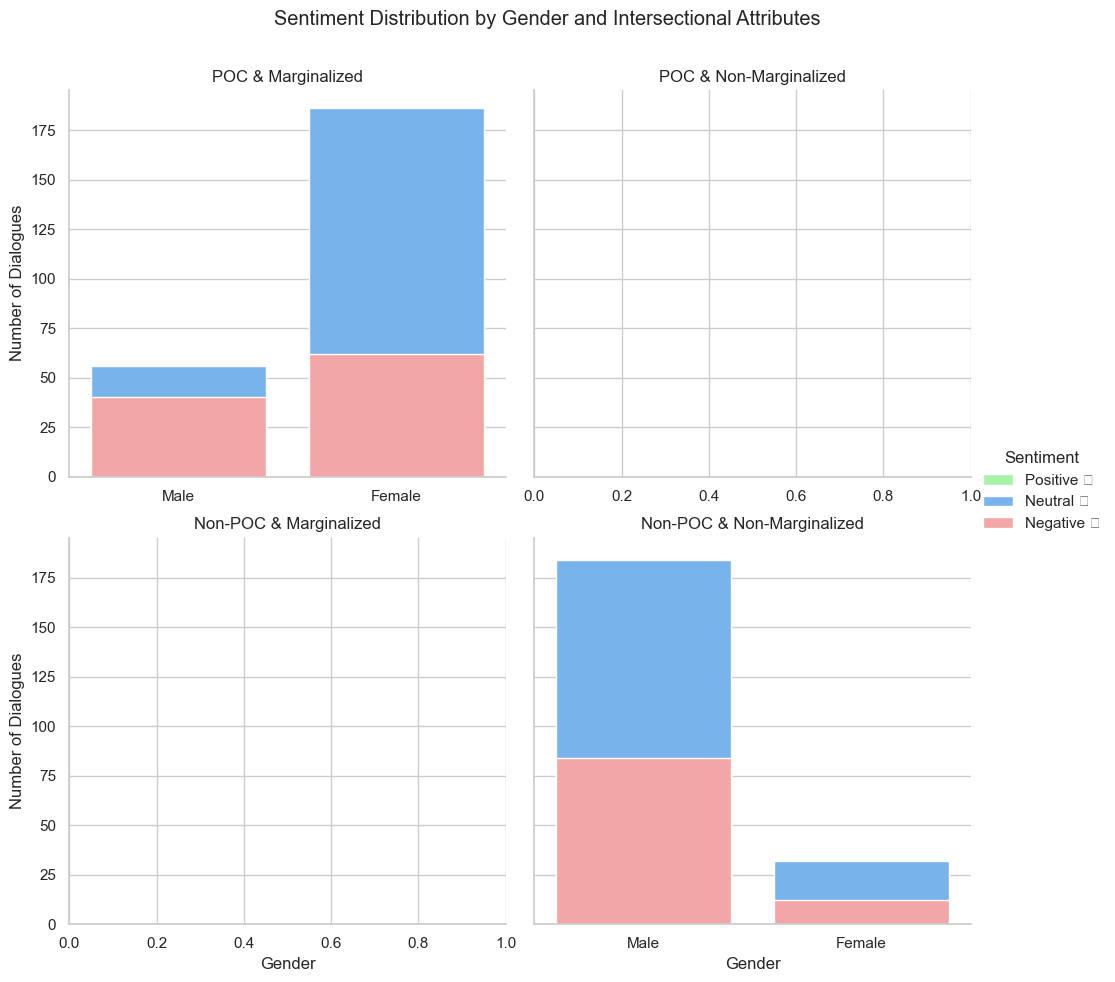

In [44]:
# Define all possible categories for POC_Marginalized
categories = [
    'POC & Marginalized',
    'POC & Non-Marginalized',
    'Non-POC & Marginalized',
    'Non-POC & Non-Marginalized'
]

# Update the 'POC_Marginalized' column with categorical type
sentiment_dialogues_df['POC_Marginalized'] = pd.Categorical(
    sentiment_dialogues_df['POC_Marginalized'],
    categories=categories
)

# Recreate the FacetGrid with the defined categories
g = sns.FacetGrid(
    sentiment_dialogues_df,
    col='POC_Marginalized',
    hue='Sentiment',
    col_wrap=2,
    height=5,
    palette=['#99ff99','#66b3ff','#ff9999'],
    sharex=False
)

g.map(sns.countplot, 'Gender', order=['Male', 'Female'])

# Add legend and titles
g.add_legend(title='Sentiment')
g.set_axis_labels('Gender', 'Number of Dialogues')
g.set_titles("{col_name}")

# Adjust the layout and add a main title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sentiment Distribution by Gender and Intersectional Attributes')

# Save the FacetGrid plot
#g.savefig(os.path.join(output_folder, 'bar_charts', 'sentiment_distribution_facetgrid_complete.png'), dpi=300, bbox_inches='tight')
filename = 'sentiment_distribution_facetgrid_complete.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath, dpi=300,bbox_inches='tight')

# Display the plot
plt.show()

# Close the plot to free memory
plt.close()

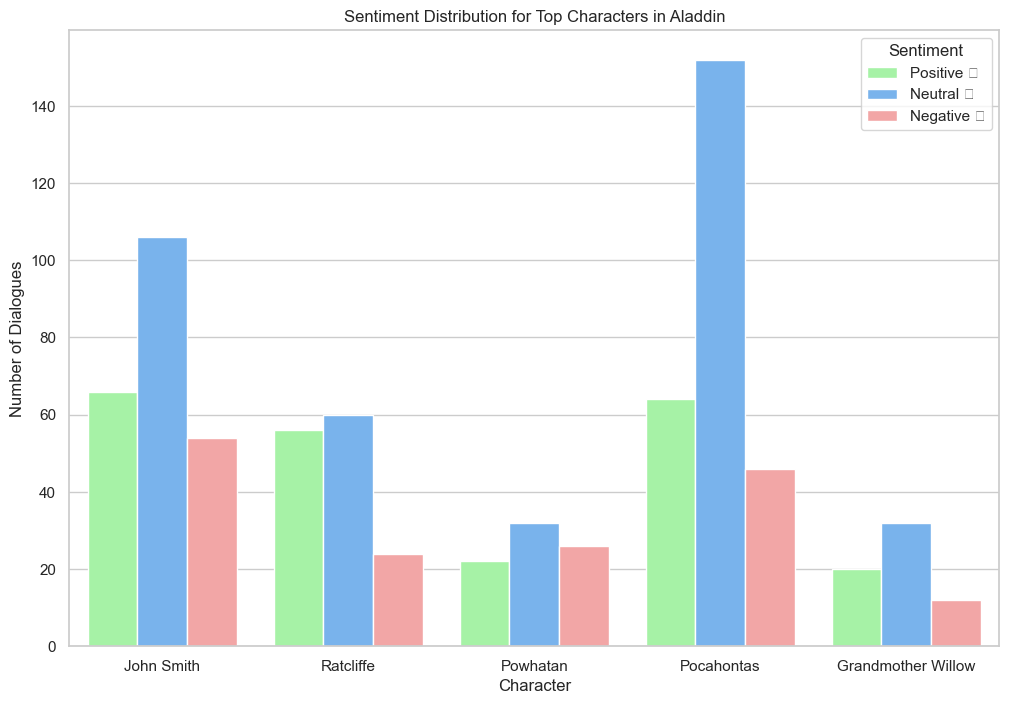

In [43]:
# Identify top 5 characters by dialogue count
top_characters = sentiment_dialogues_df['Character'].value_counts().head(5).index.tolist()

# Filter data for top characters
top_characters_data = sentiment_dialogues_df[sentiment_dialogues_df['Character'].isin(top_characters)]

# Plot sentiment distribution for top characters
plt.figure(figsize=(12, 8))
sns.countplot(x='Character', hue='Sentiment', data=top_characters_data, palette=['#99ff99', '#66b3ff', '#ff9999'])
plt.title('Sentiment Distribution for Top Characters in Aladdin')
plt.xlabel('Character')
plt.ylabel('Number of Dialogues')
plt.legend(title='Sentiment')
filename = 'sentiment_distribution_top_characters.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath, dpi=300,bbox_inches='tight')
plt.show()
plt.close()